In [1]:
import rdkit.Chem as Chem
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../data/slv_amides/kasia_amide.csv')
df_ = pd.read_csv('../data/slv_amides/pawel_amide_parallel.csv')
slv_df = pd.concat([df, df_])
slv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 122
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reaction number  167 non-null    object 
 1   yield            167 non-null    float64
 2   amine_smiles     167 non-null    object 
 3   acid_smiles      167 non-null    object 
 4   activator        44 non-null     object 
 5   conditions       123 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.1+ KB


In [3]:
def draw_multiple_smi_rdkit(smiles_list: list, molsPerRow=4, legends=None):
    mols = [Chem.MolFromSmiles(s) for s in smiles_list]
    if not legends:
        legends = [str(i) for i in range(1, len(mols) + 1)]
    display(Chem.Draw.MolsToGridImage(mols, molsPerRow=molsPerRow, legends=legends))

In [4]:
def is_primary(smi):
    mol = Chem.MolFromSmiles(smi)
    for a in mol.GetAtoms():
        if a.GetSymbol() == 'N':
            if a.GetNumImplicitHs() == 2:
                return True
    return False

def is_secondary(smi):
    mol = Chem.MolFromSmiles(smi)
    return any([a.GetNumImplicitHs() == 1 for a in mol.GetAtoms() if a.GetSymbol() == 'N'])
    # for a in mol.GetAtoms():
    #     if a.GetSymbol() == 'N':
    #         if a.GetNumImplicitHs() == 2:
    #             return True
    # return False


In [5]:
primary = slv_df[slv_df.amine_smiles.apply(is_primary)].amine_smiles.drop_duplicates()
secondary = slv_df[slv_df.amine_smiles.apply(is_secondary)].amine_smiles.drop_duplicates()

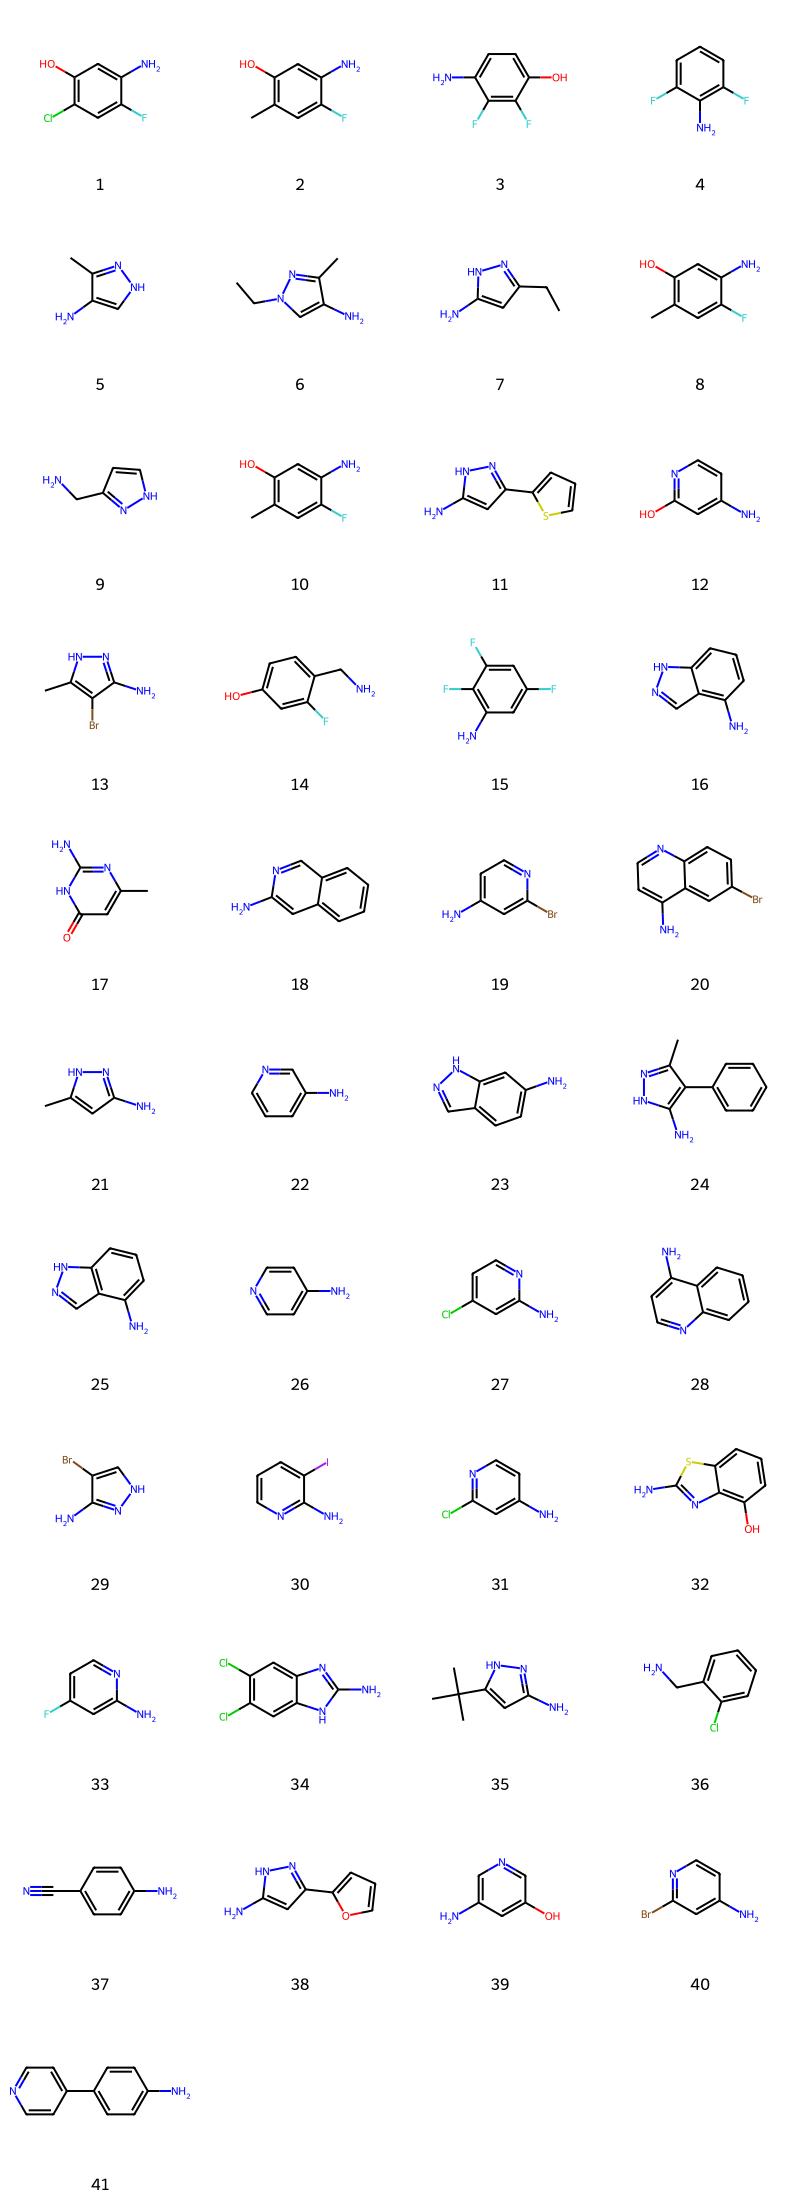

In [6]:
# draw_multiple_smi_rdkit(slv_df.amine_smiles.unique())
draw_multiple_smi_rdkit(primary)

/home/ergot/miniforge3/envs/linux_qm/lib/python3.10/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


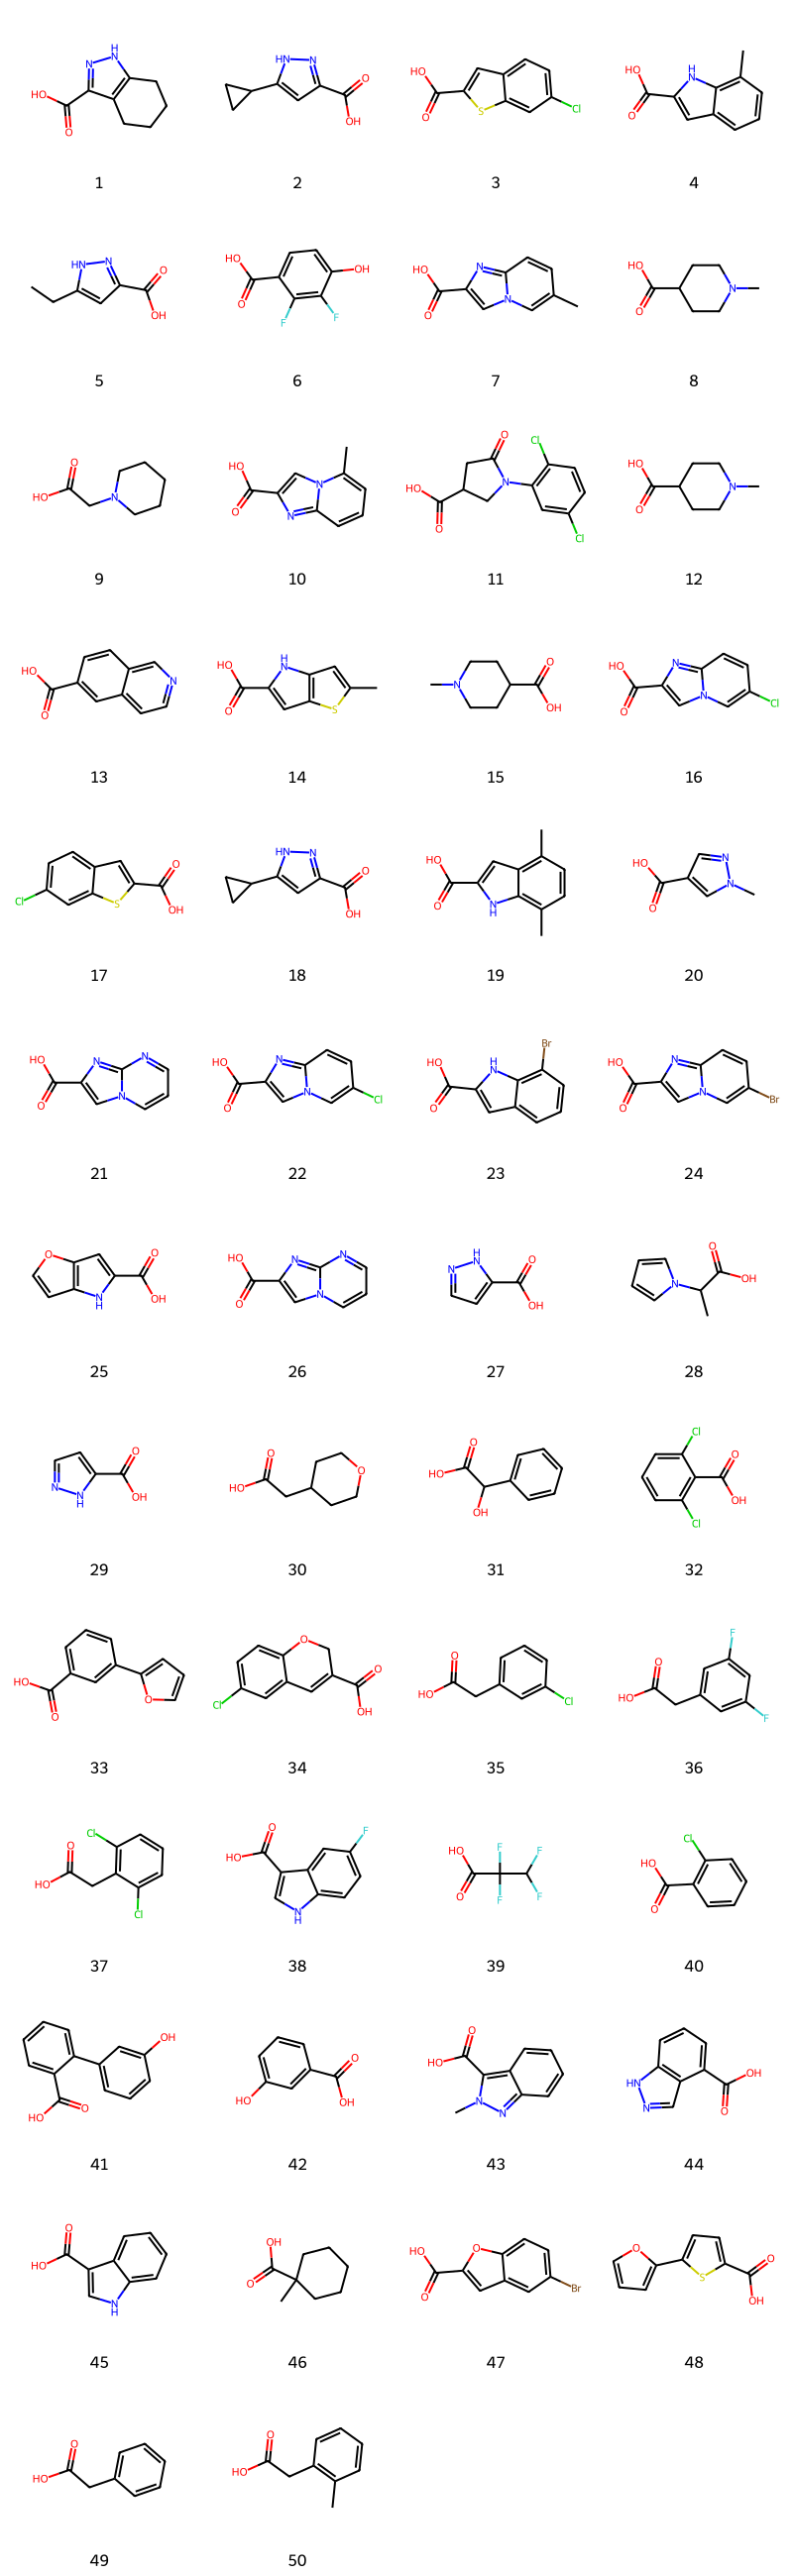

In [7]:
draw_multiple_smi_rdkit(slv_df.acid_smiles.unique())

<Axes: xlabel='yield', ylabel='Count'>

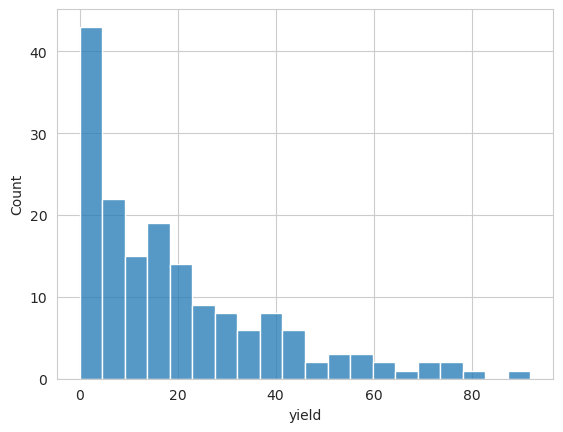

In [8]:
sns.histplot(
    slv_df['yield'],
    bins=20
)

In [9]:
low_yield = slv_df['yield'] < 5
primary_low_yield = slv_df.amine_smiles.apply(is_primary) & low_yield
primary_low_yield.sum()

38

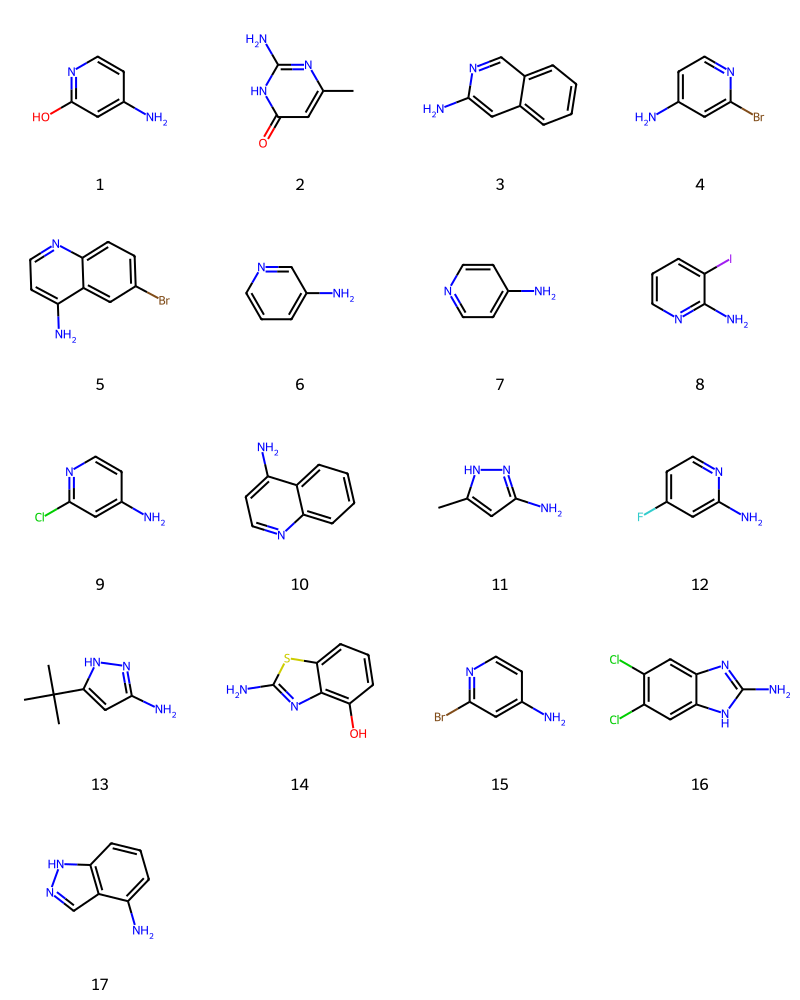

In [10]:
draw_multiple_smi_rdkit(slv_df.amine_smiles[primary_low_yield].unique())

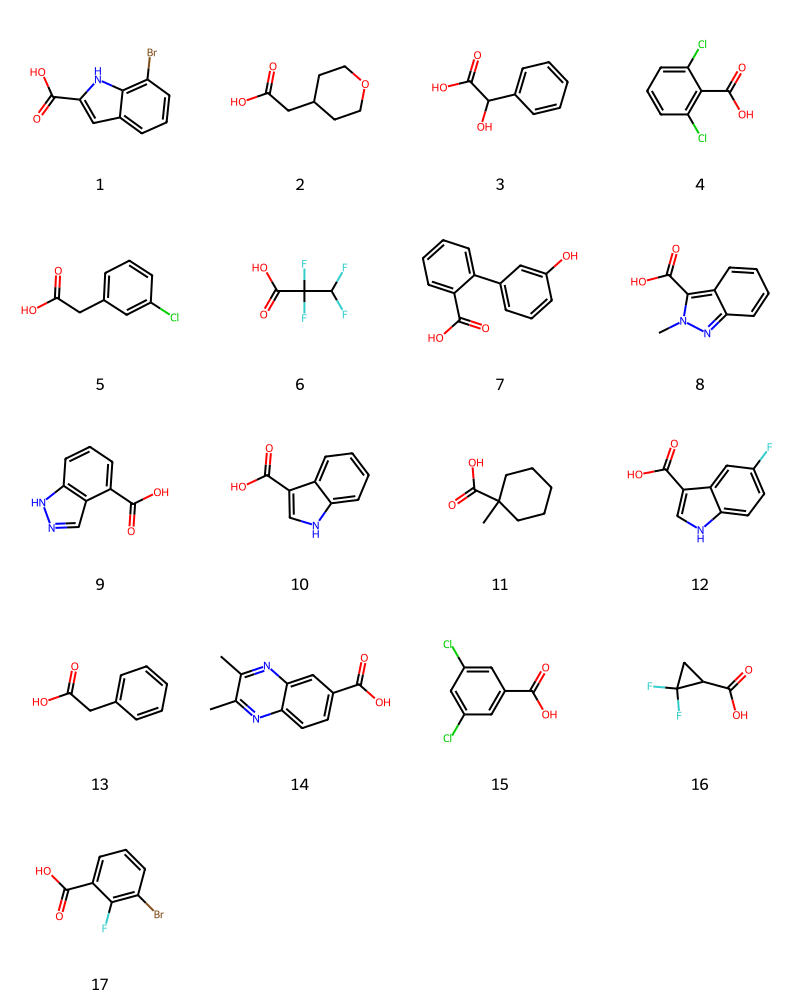

In [11]:
draw_multiple_smi_rdkit(slv_df.acid_smiles[primary_low_yield].unique())

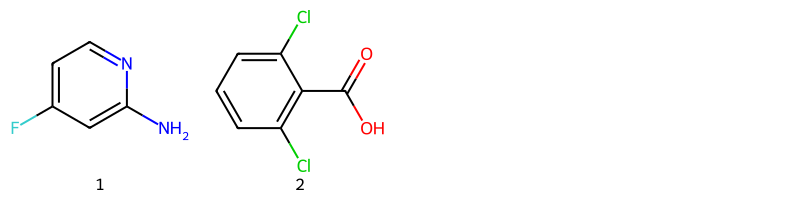

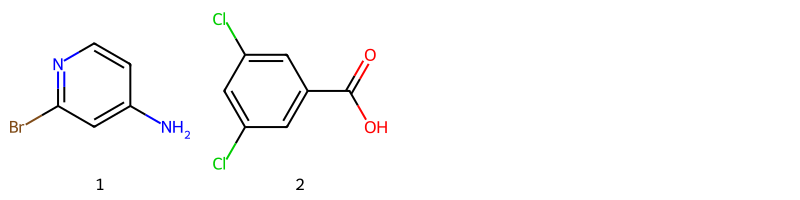

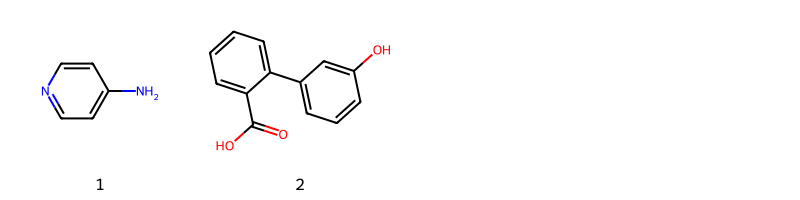

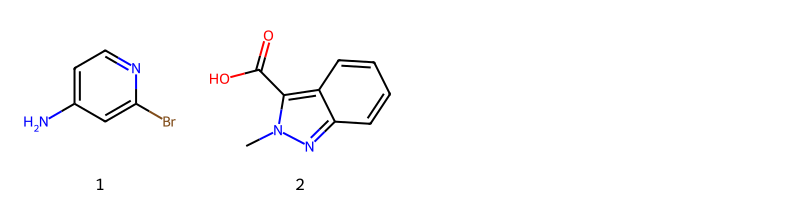

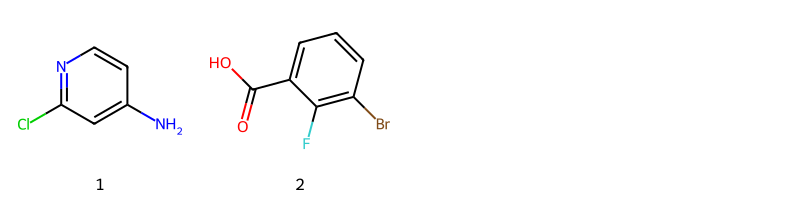

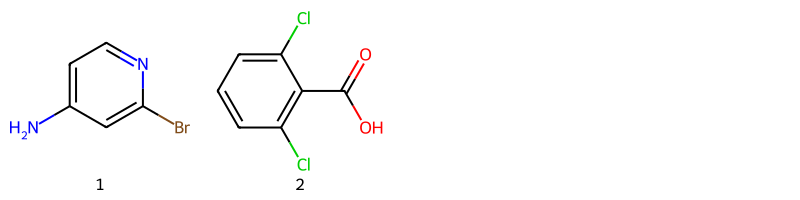

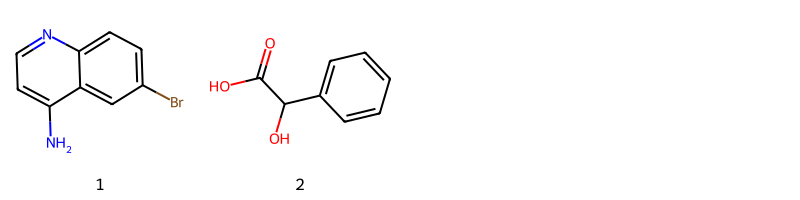

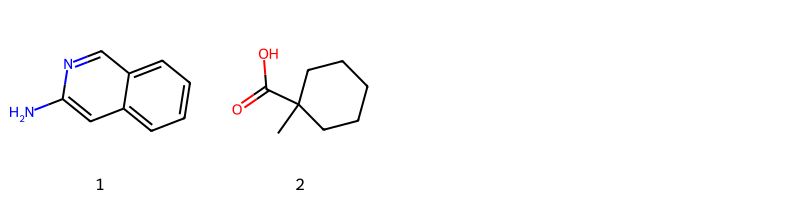

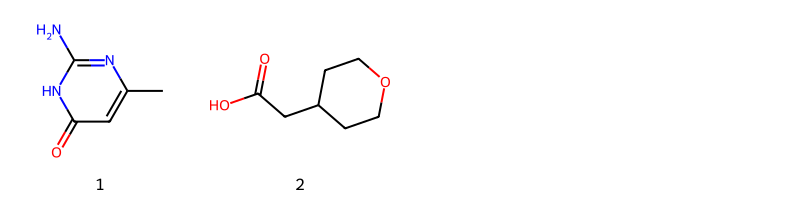

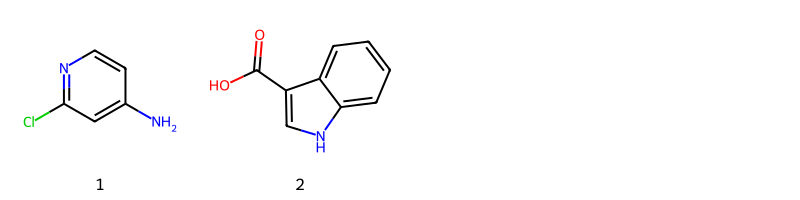

In [12]:
amines, acids = slv_df.amine_smiles[primary_low_yield], slv_df.acid_smiles[primary_low_yield]
for idx, row in slv_df[primary_low_yield].sample(10).iterrows():
    draw_multiple_smi_rdkit([row['amine_smiles'], row['acid_smiles']])

# PNAS
https://www.pnas.org/doi/10.1073/pnas.2118451119

In [13]:
dataset = \
"""
Ac13-N1b Ac13 N1 0.0324 -3.430 -2.435
Ac16-N1 Ac16 N1 0.7690 -0.263 0.362
Ac4-N2 Ac4 N2 0.7521 -0.285 -1.086
Ac5-N2b Ac5 N2 0.0766 -2.569 -1.961
Ac17-N2b Ac17 N2 0.4886 -0.716 -0.855
Ac4-N3b Ac4 N3 0.3328 -1.100 -2.304
Ac8-N3 Ac8 N3 4.8788 1.585 -0.005
Ac12-N3 Ac12 N3 5.9721 1.787 1.432
Ac17-N3 Ac17 N3 0.6173 -0.482 -2.074
Ac6-N4 Ac6 N4 0.1145 -2.167 -2.646
Ac15-N5 Ac15 N5 0.6427 -0.442 0.647
Ac17-N5 Ac17 N5 0.0335 -3.396 -3.135
Ac1-N6b Ac1 N6 1.5673 0.449 0.525
Ac5-N6 Ac5 N6 0.0271 -3.610 -2.736
Ac8-N6b Ac8 N6 7.8457 2.060 0.439
Ac9-N6 Ac9 N6 1.2320 0.209 -0.065
Ac12-N6 Ac12 N6 4.8703 1.583 1.875
Ac17-N6b Ac17 N6 0.1390 -1.974 -1.630
Ac3-N7 Ac3 N7 6.7767 1.913 1.147
Ac4-N7 Ac4 N7 0.2922 -1.230 -1.490
Ac2-N8 Ac2 N8 6.0444 1.799 2.117
Ac19-N8 Ac19 N8 1.1503 0.140 1.156
Ac9-N9b Ac9 N9 0.0184 -3.998 -2.592
Ac21-N9b Ac21 N9 1.0712 0.069 -1.390
Ac1-N10 Ac1 N10 0.5928 -0.523 -1.125
Ac11-N10 Ac11 N10 2.8829 1.059 1.095
Ac10-N11 Ac10 N11 4.8470 1.578 0.452
Ac20-N11 Ac20 N11 0.6730 -0.396 -0.579
Ac22-N11b Ac22 N11 0.7507 -0.287 0.133
Ac1-N12 Ac1 N12 0.7926 -0.232 1.039
Ac18-N12b Ac18 N12 3.5844 1.277 1.829
Ac2-N13 Ac2 N13 7.1229 1.963 1.759
Ac8-N13b Ac8 N13 5.1781 1.644 0.856
Ac14-N13 Ac14 N13 10.0267 2.305 0.724
Ac7-N14 Ac7 N14 0.0341 -3.380 -1.492
Ac17-N14 Ac17 N14 0.0217 -3.830 -2.662
Ac22-N14 Ac22 N14 2.6537 0.976 0.819
Ac5-N15 Ac5 N15 0.0713 -2.641 -2.330
Ac6-N15 Ac6 N15 0.0634 -2.758 -2.147
Ac7-N15 Ac7 N15 0.8803 -0.127 -0.054
Ac15-N15 Ac15 N15 4.0469 1.398 2.559
Ac17-N15 Ac17 N15 1.1216 0.115 -1.224
Ac13-N16 Ac13 N16 0.0148 -4.217 -3.904
Ac15-N16b Ac15 N16 2.2738 0.821 1.125
"""
data = []
for row in dataset.split('\n')[1:-1]:
    data.append(row.split(' '))
    print(row.split(' '))

['Ac13-N1b', 'Ac13', 'N1', '0.0324', '-3.430', '-2.435']
['Ac16-N1', 'Ac16', 'N1', '0.7690', '-0.263', '0.362']
['Ac4-N2', 'Ac4', 'N2', '0.7521', '-0.285', '-1.086']
['Ac5-N2b', 'Ac5', 'N2', '0.0766', '-2.569', '-1.961']
['Ac17-N2b', 'Ac17', 'N2', '0.4886', '-0.716', '-0.855']
['Ac4-N3b', 'Ac4', 'N3', '0.3328', '-1.100', '-2.304']
['Ac8-N3', 'Ac8', 'N3', '4.8788', '1.585', '-0.005']
['Ac12-N3', 'Ac12', 'N3', '5.9721', '1.787', '1.432']
['Ac17-N3', 'Ac17', 'N3', '0.6173', '-0.482', '-2.074']
['Ac6-N4', 'Ac6', 'N4', '0.1145', '-2.167', '-2.646']
['Ac15-N5', 'Ac15', 'N5', '0.6427', '-0.442', '0.647']
['Ac17-N5', 'Ac17', 'N5', '0.0335', '-3.396', '-3.135']
['Ac1-N6b', 'Ac1', 'N6', '1.5673', '0.449', '0.525']
['Ac5-N6', 'Ac5', 'N6', '0.0271', '-3.610', '-2.736']
['Ac8-N6b', 'Ac8', 'N6', '7.8457', '2.060', '0.439']
['Ac9-N6', 'Ac9', 'N6', '1.2320', '0.209', '-0.065']
['Ac12-N6', 'Ac12', 'N6', '4.8703', '1.583', '1.875']
['Ac17-N6b', 'Ac17', 'N6', '0.1390', '-1.974', '-1.630']
['Ac3-N7', 'Ac3

In [14]:
lit_df = pd.DataFrame(data, columns=['rxn', 'acid', 'amine', 'avg_k', 'ln_k', 'pred_k'])
lit_df.avg_k = lit_df.avg_k.astype(float)
lit_df.ln_k = lit_df.ln_k.astype(float)
lit_df.pred_k = lit_df.pred_k.astype(float)
lit_df

,rxn,acid,amine,avg_k,ln_k,pred_k
0,Ac13-N1b,Ac13,N1,0.0324,-3.430,-2.435
1,Ac16-N1,Ac16,N1,0.7690,-0.263,0.362
2,Ac4-N2,Ac4,N2,0.7521,-0.285,-1.086
3,Ac5-N2b,Ac5,N2,0.0766,-2.569,-1.961
4,Ac17-N2b,Ac17,N2,0.4886,-0.716,-0.855
5,Ac4-N3b,Ac4,N3,0.3328,-1.100,-2.304
6,Ac8-N3,Ac8,N3,4.8788,1.585,-0.005
7,Ac12-N3,Ac12,N3,5.9721,1.787,1.432
8,Ac17-N3,Ac17,N3,0.6173,-0.482,-2.074
9,Ac6-N4,Ac6,N4,0.1145,-2.167,-2.646


In [15]:
acid_list = [
    'OC(CCCCCCCCC)=O',
    'OC(CNC(OC(C)(C)C)=O)=O',
    'OC(C1=CC(C(F)(F)F)=CC(C(F)(F)F)=C1)=O',
    'OC(C1=CC=CC=C1OC)=O',
    'CC(C(O)=O)(C)C1=CC=CC=C1',
    'OC(C1(C(OCC)=O)CCC1)=O',
    'OC(C1CCCCC1)=O',
    'O=C(O)C1=CSC=N1',
    'FC1=NC=CC=C1C(O)=O',
    'OC(COC1=CC=CC=C1)=O',
    'O=C(C(O)=O)C1=CC=CC=C1',
    'OC(C1=CN=CO1)=O',
    'CN1C=C(C(O)=O)C2=CC=CC=C21',
    'ClC1=CC(CC(O)=O)=C(Br)C=C1',
    'ClC1=C(/C=C/C(O)=O)C(Cl)=CC=C1',
    'CC1=C(C(O)=O)C=C(C)O1',
    'O=C(O)C1(C2=CC=CC=C2)CC1',
    'O=C(O)C1=CC2=CC=CC=C2O1',
    'CC(C)CC(O)=O',
    'ClC1=CC=CC(C(O)=O)=N1',
    'OC(C1=NC=CC(Cl)=C1)=O',
    'OC(C1=NC=C(F)C=C1F)=O',
]

In [16]:
amine_list = [
    'NCCOC',
    'NCC1CCCCC1',
    'NCCC1=CC=CC=C1Cl',
    'NCC1=CC=C(C2=CC=CC=C2)C=C1',
    'NC1CCOCC1',
    'NCC1=CC=CC2=CC=CC=C21',
    'NCC1=NC=CC=C1',
    'NCC1=CC=CN=C1',
    'NC(C1=CC=CC=C1)CC2=CC=CC=C2',
    'COC1=CC=C(C(C)N)C=C1',
    'N[C@H]1CCCC[C@@H]1OCC2=CC=CC=C2',
    'NCC1=CC=CS1',
    'NCC1=CC=C(C(F)(F)F)C=C1',
    'NCC1=C(Cl)C=CC(C(F)(F)F)=C1',
    'COC1=CC=CC=C1CN',
    'NC1CCCC1',
]

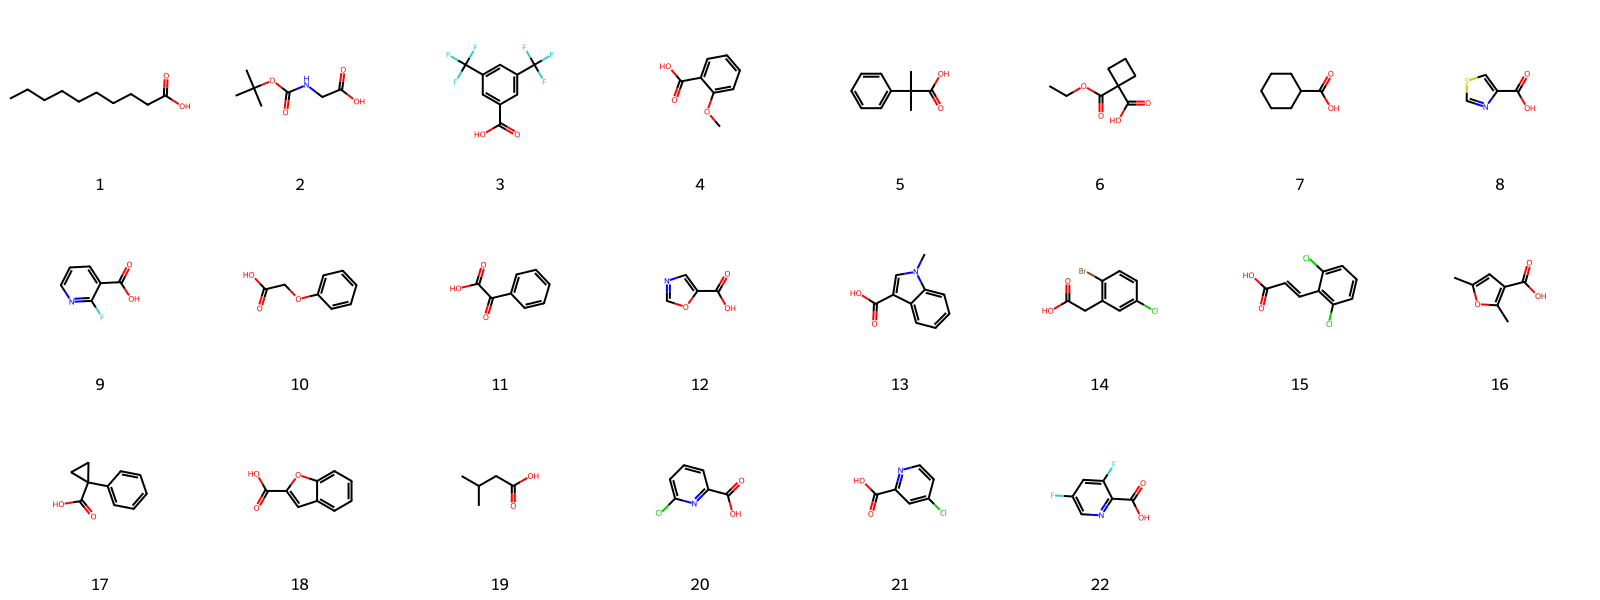

In [17]:
draw_multiple_smi_rdkit(acid_list, molsPerRow=8)

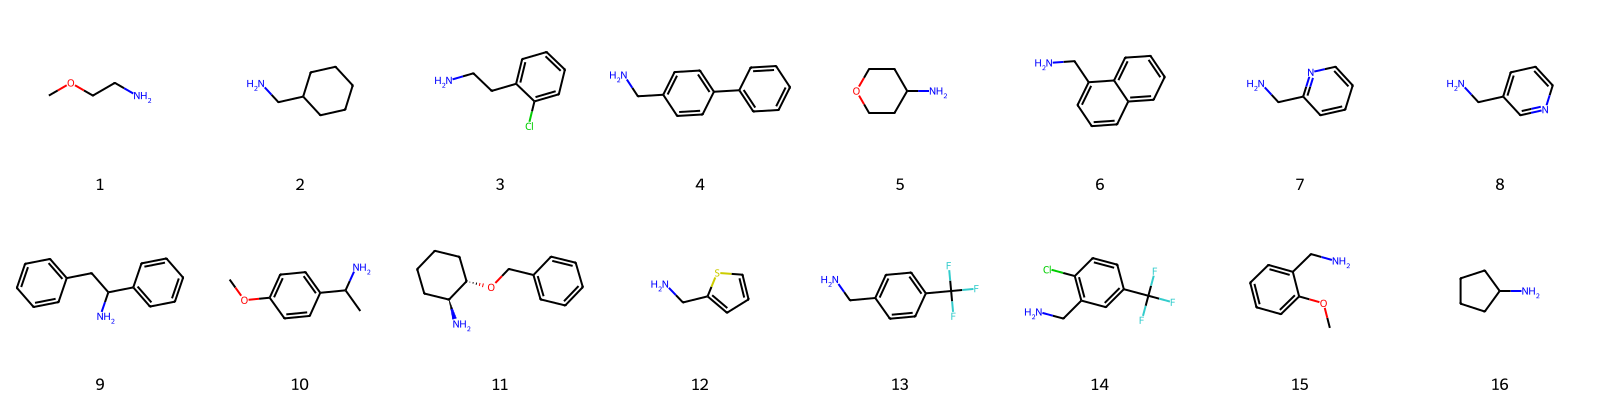

In [18]:
draw_multiple_smi_rdkit(amine_list, molsPerRow=8)

In [19]:
acid_dict = {}
for i in range(0, len(acid_list)):
    acid_dict[f"Ac{i+1}"] = acid_list[i]

amine_dict = {}
for i in range(0, len(amine_list)):
    amine_dict[f"N{i+1}"] = amine_list[i]


lit_df['acid_smi'] = lit_df.acid.map(acid_dict).apply(Chem.CanonSmiles)
lit_df['amine_smi'] = lit_df.amine.map(amine_dict).apply(Chem.CanonSmiles)
lit_df

,rxn,acid,amine,avg_k,ln_k,pred_k,acid_smi,amine_smi
0,Ac13-N1b,Ac13,N1,0.0324,-3.430,-2.435,Cn1cc(C(=O)O)c2ccccc21,COCCN
1,Ac16-N1,Ac16,N1,0.7690,-0.263,0.362,Cc1cc(C(=O)O)c(C)o1,COCCN
2,Ac4-N2,Ac4,N2,0.7521,-0.285,-1.086,COc1ccccc1C(=O)O,NCC1CCCCC1
3,Ac5-N2b,Ac5,N2,0.0766,-2.569,-1.961,CC(C)(C(=O)O)c1ccccc1,NCC1CCCCC1
4,Ac17-N2b,Ac17,N2,0.4886,-0.716,-0.855,O=C(O)C1(c2ccccc2)CC1,NCC1CCCCC1
5,Ac4-N3b,Ac4,N3,0.3328,-1.100,-2.304,COc1ccccc1C(=O)O,NCCc1ccccc1Cl
6,Ac8-N3,Ac8,N3,4.8788,1.585,-0.005,O=C(O)c1cscn1,NCCc1ccccc1Cl
7,Ac12-N3,Ac12,N3,5.9721,1.787,1.432,O=C(O)c1cnco1,NCCc1ccccc1Cl
8,Ac17-N3,Ac17,N3,0.6173,-0.482,-2.074,O=C(O)C1(c2ccccc2)CC1,NCCc1ccccc1Cl
9,Ac6-N4,Ac6,N4,0.1145,-2.167,-2.646,CCOC(=O)C1(C(=O)O)CCC1,NCc1ccc(-c2ccccc2)cc1


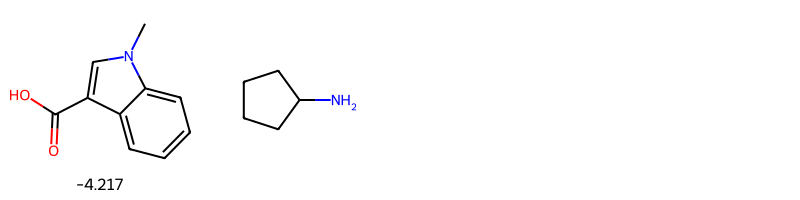

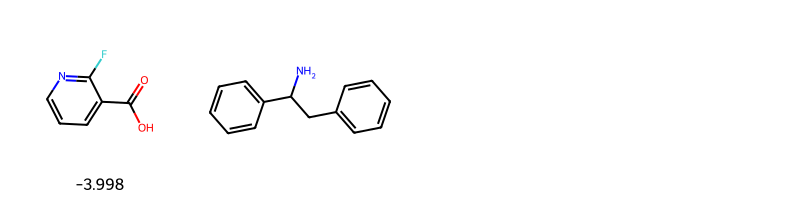

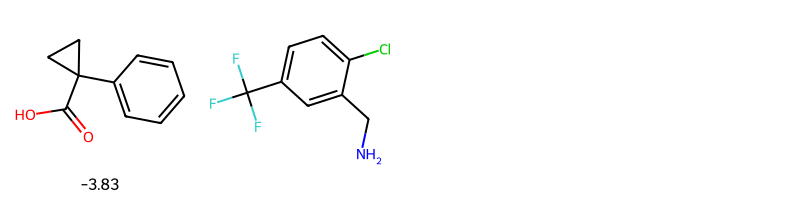

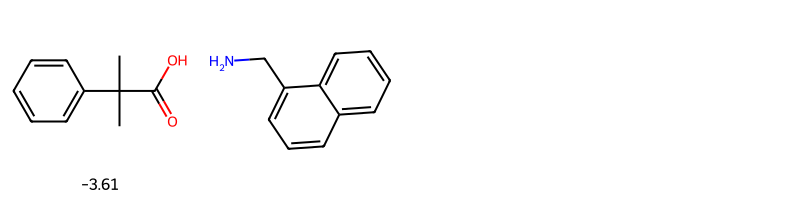

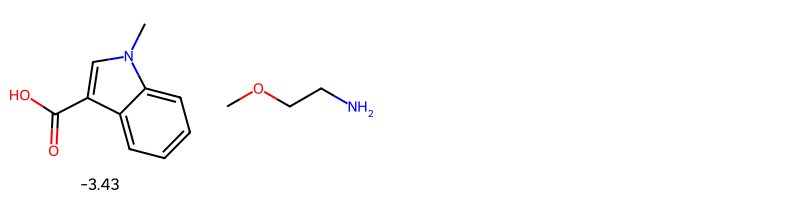

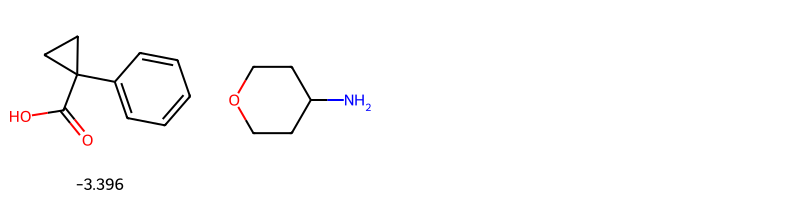

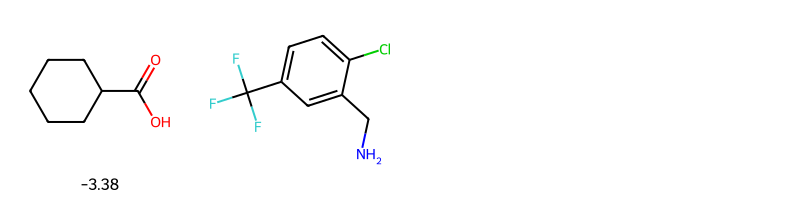

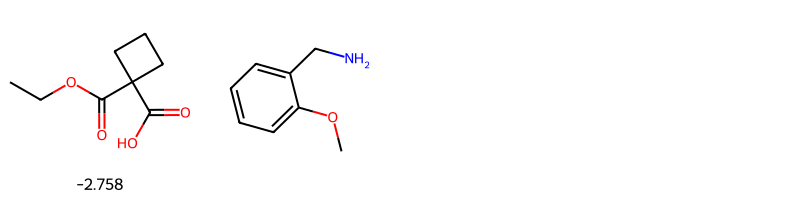

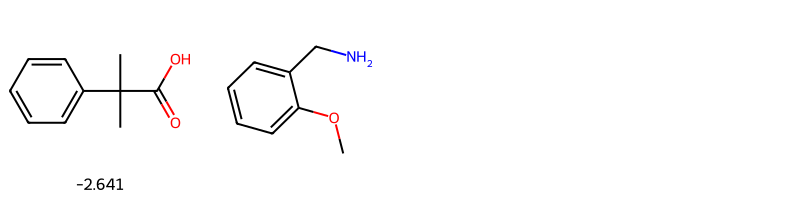

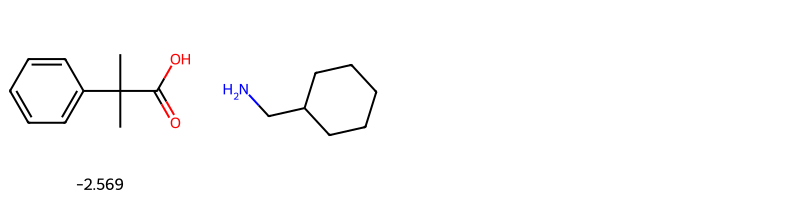

In [20]:
for idx, row in lit_df.sort_values(by='ln_k')[:10].iterrows():
    draw_multiple_smi_rdkit(row[['acid_smi', 'amine_smi']], legends=[str(row['ln_k']), ''])

In [ ]:
for idx, row in lit_df.sort_values(by='ln_k')[:10].iterrows():
    draw_multiple_smi_rdkit(row[['acid_smi', 'amine_smi']], legends=[str(row['ln_k']), ''])

In [48]:
non_active_acids = lit_df.sort_values(by='ln_k')[:10].acid_smi.unique()

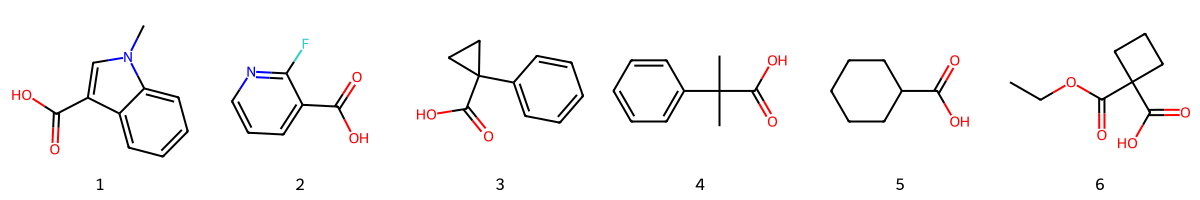

In [49]:
draw_multiple_smi_rdkit(non_active_acids, molsPerRow=6)

In [50]:
def draw_smi(smi):
    display(Chem.MolFromSmiles(smi))

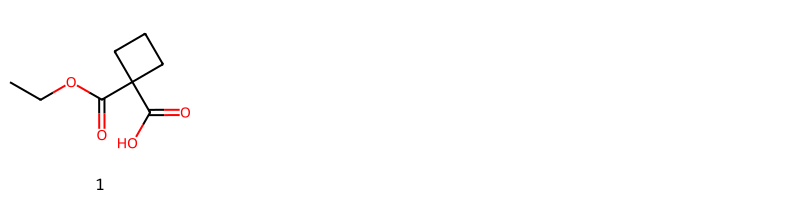

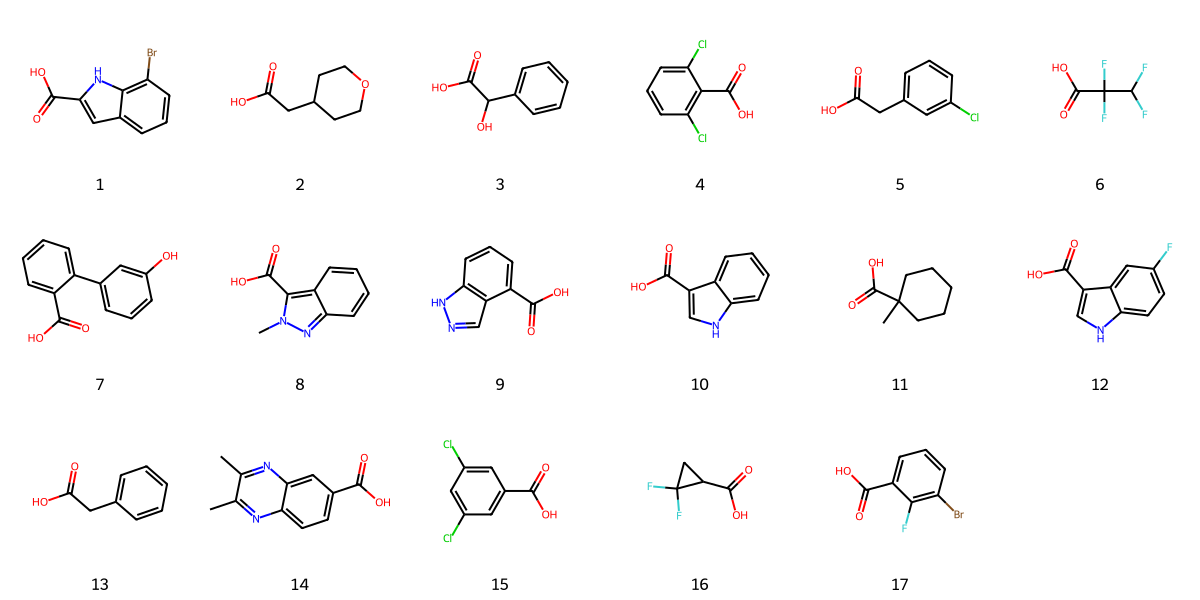

In [62]:

# draw_smi(non_active_acids[0])
# mask = [0, 7, 8, 9, 11]
# draw_multiple_smi_rdkit(slv_df.acid_smiles[primary_low_yield].unique()[mask], molsPerRow=6)

# draw_smi(non_active_acids[1])
# mask = [3, 16, 14]
# draw_multiple_smi_rdkit(slv_df.acid_smiles[primary_low_yield].unique()[mask], molsPerRow=6)

# draw_multiple_smi_rdkit(non_active_acids[2:4])
# mask = [2, 4, 12]
# draw_multiple_smi_rdkit(slv_df.acid_smiles[primary_low_yield].unique()[mask], molsPerRow=6)

# draw_multiple_smi_rdkit([non_active_acids[4]])
# draw_multiple_smi_rdkit(slv_df.acid_smiles[primary_low_yield].unique()[[1, 10]], molsPerRow=6)

draw_multiple_smi_rdkit([non_active_acids[5]])
draw_multiple_smi_rdkit(slv_df.acid_smiles[primary_low_yield].unique(), molsPerRow=6)